# Dataset exploration

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('..\\assignment-1\\data\\train.csv')

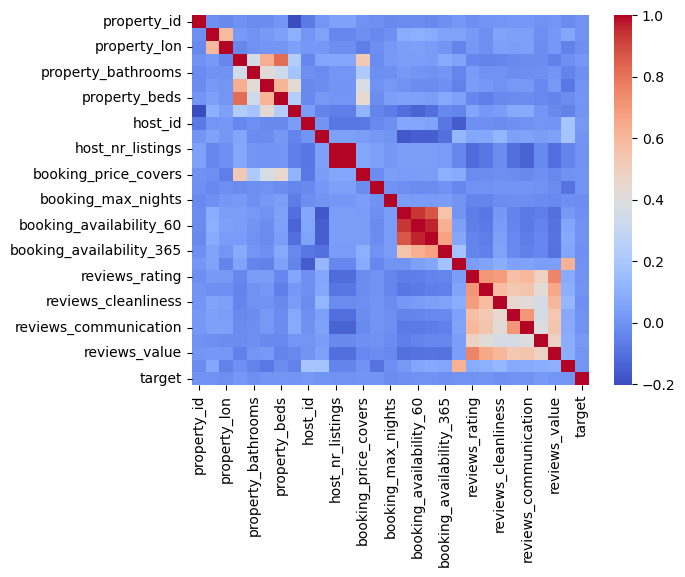

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')

# Show the plot
plt.show()

# Baseline XGBoost model
only numerical columns, no preprocessing

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
X, y = df.drop('target', axis=1), df[['target']]
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
X_train, X_test, y_train, y_test = train_test_split(X[numerical_columns], y, random_state=1)


In [18]:
xgb_reg = xgb.XGBRegressor()

In [20]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [23]:
preds = xgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 63.764820


# Autotuned XGBoost 

In [25]:
from xgbtune import tune_xgb_model
params = {'eval_metric': 'rmse'}
params, round_count = tune_xgb_model(params, X_train, y_train)

tuning pass 0...
computing best round...
best round: 7
tuning max_depth and min_child_weight ...
best loss: 38.1981
best max_depth: 8
best min_child_weight: 3
tuning gamma ...
best loss: 38.1981
best gamma: 0.0
re-computing best round...
best round: 7
tuning subsample and colsample_bytree ...
best loss: 38.1981
best subsample: 1.0
best colsample_bytree: 1.0
fine tuning subsample and colsample_bytree ...
best loss: 37.7751
best subsample: 1.0
best colsample_bytree: 0.95
tuning alpha and lambda ...
best loss: 37.7751
best alpha: 0
best lambda: 1
tuning seed ...
best loss: 37.7751
best seed: 0
{'eval_metric': 'rmse', 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.0, 'subsample': 1.0, 'colsample_bytree': 0.95, 'alpha': 0, 'lambda': 1, 'seed': 0}
tuning pass 1...
computing best round...
best round: 7
tuning max_depth and min_child_weight ...
best loss: 37.7751
best max_depth: 8
best min_child_weight: 3
tuning gamma ...
best loss: 37.7751
best gamma: 0.0
re-computing best round...
best ro

In [26]:
regressor=xgb.XGBRegressor(**params)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 63.568690
